# reg1d con regresión polinómica

Supongamos que reg1d es una tarea real, por lo que solo tenemos datos y no conocemos el modelo real subyacente a los mismos. Al igual que hemos hecho con clasificadores (generativos y discriminativos) en iris y digits, empleamos sklearn para aprender y evaluar modelos de regresión polinómica en reg1d.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reg1d import load_reg1d
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import mean_squared_error

Lectura del corpus reg1d:

In [2]:
X_train, y_train, X_test, y_test = load_reg1d()

Para evitar problemas numéricos al hallar características polinómicas, normalizamos las entradas en $[-1, 1]$ mediante escalado simple con `MinMaxScaler`. Asimismo, reformatamos X_train y X_test como matrices de datos (arrays 2d) en lugar de arrays 1d para facilitar su procesamiento.

In [3]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.transform(X_test.reshape(-1, 1))

## Modelo lineal

Regresión lineal ajusta el sesgo $w_0$ (`intercept_`) y coeficiente de regresión lineal $w_1$ (`coef_`) del predictor de media, $f(x;\boldsymbol{w})=w_0+w_1x$, por mínimos cuadrados (OLS, ordinary least squares):

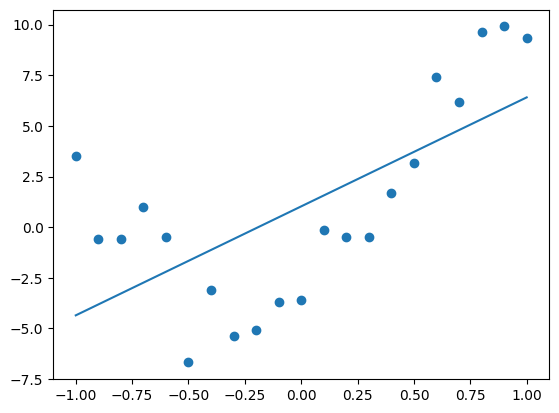

In [4]:
regr = LinearRegression()
regr.fit(X_train, y_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, regr.intercept_ + regr.coef_ * X_train);

La calidad del modelo ajustado puede evaluarse mediante el error cuadrático medio en train y test:

In [5]:
mse_train = mean_squared_error(y_train, regr.predict(X_train))
mse_test = mean_squared_error(y_test, regr.predict(X_test))
print('El MSE de {0!s} es {1:.2f} en training y {2:.2f} en test'.format(regr, mse_train, mse_test))

El MSE de LinearRegression() es 13.80 en training y 16.45 en test


## Modelo cuadrático

Con el fin de ajustar un predictor de media cuadrático, $f(x;\boldsymbol{w})=w_0+w_1x+w_2x^2$, primero transformarmos las entradas de $x$ a $(x, x^2)$ mediante `PolynomialFeatures` con `degree=2` y `include_bias=False`:

In [9]:
regr = LinearRegression()
poly_feats = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_feats.fit_transform(X_train)
X_test_poly = poly_feats.transform(X_test)
print(np.hstack((X_train[:3,], X_train_poly[:3,])))
print(np.hstack((X_test[:3,], X_test_poly[:3,])))

[[-1.   -1.    1.  ]
 [-0.9  -0.9   0.81]
 [-0.8  -0.8   0.64]]
[[-1.     -1.      1.    ]
 [-0.99   -0.99    0.9801]
 [-0.98   -0.98    0.9604]]


Luego ajustamos y evaluamos el modelo sin más:

MSE con grado 2: 3.14 en training y 5.84 en test


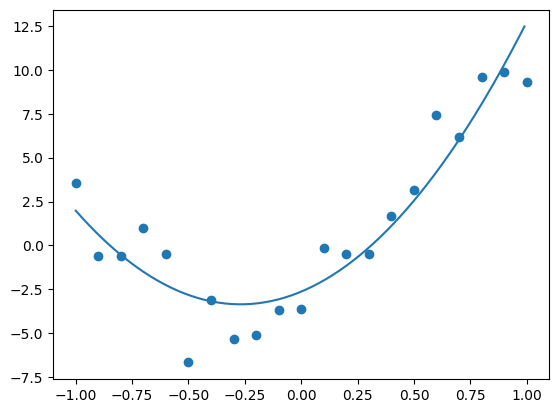

In [7]:
regr.fit(X_train_poly, y_train)
y_train_pred = regr.predict(X_train_poly)
mse_train = mean_squared_error(y_train_pred, y_train)
y_test_pred = regr.predict(X_test_poly)
mse_test = mean_squared_error(y_test_pred, y_test)
print('MSE con grado 2: {0:.2f} en training y {1:.2f} en test'.format(mse_train, mse_test))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_test_pred);

**Ejercicio:** Extiende el modelo cuadrático a polinomios de grado $D$, $D=1, 2, \dotsc, 15$, y representa gráficamente el error cuadrático medio en training y test en función de $D$.

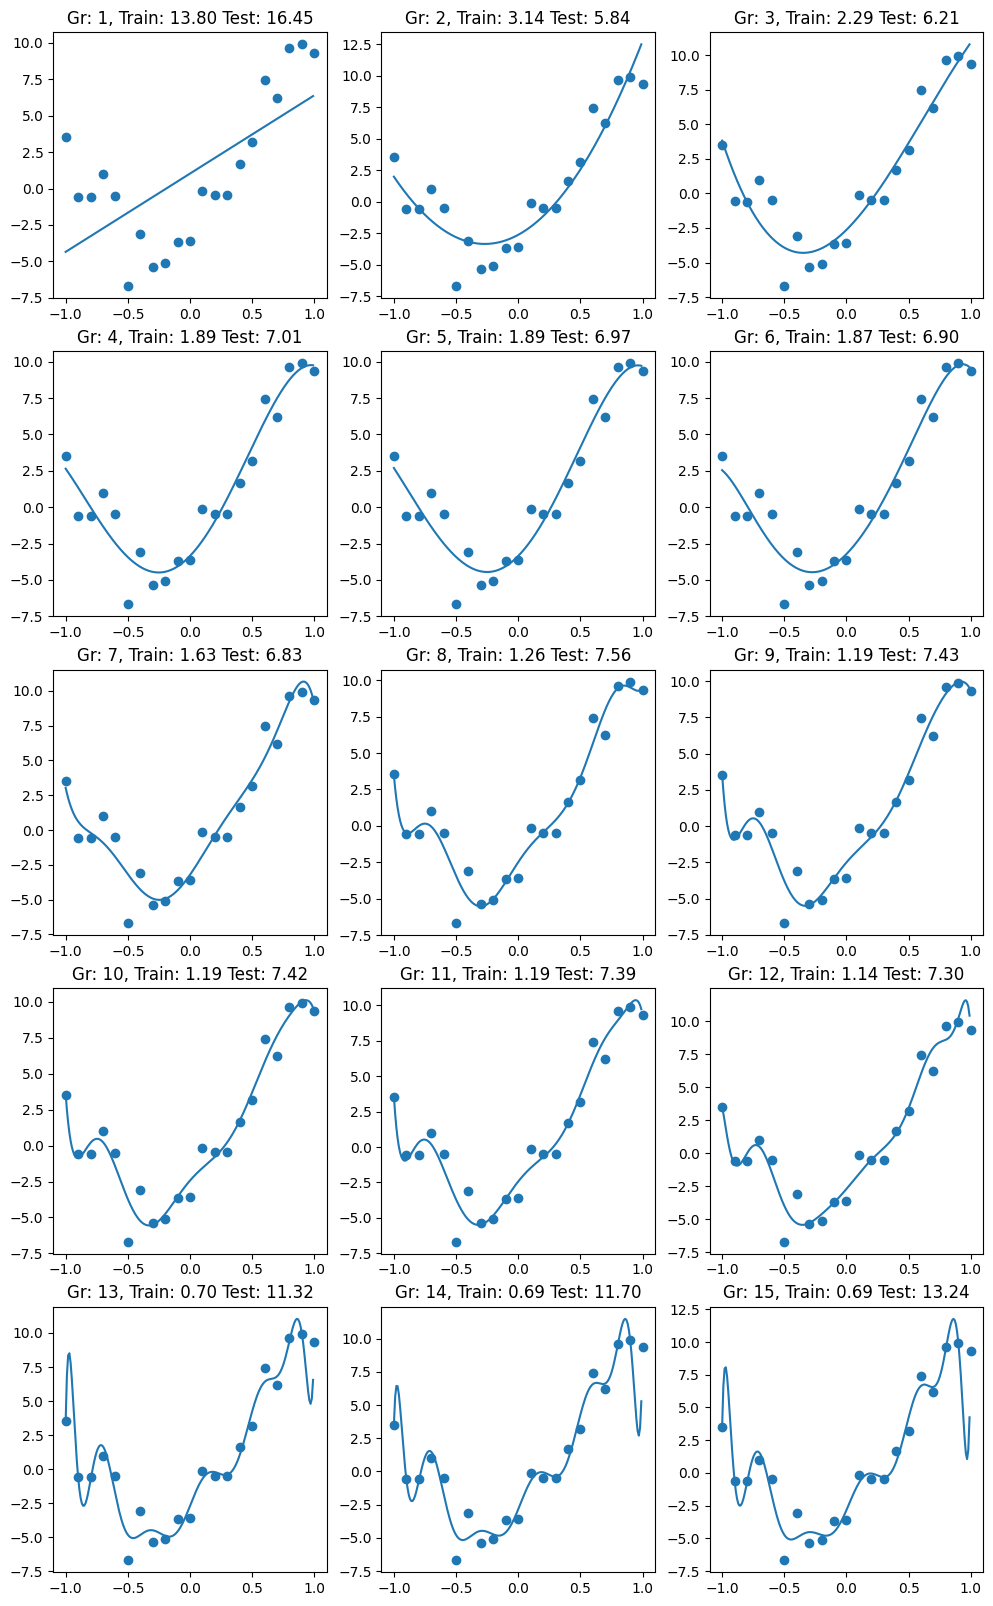

In [13]:
fig, ax = plt.subplots(5,3,figsize=(12,20))
for degree in range(1,16):
    regr = LinearRegression()
    poly_feats = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_feats.fit_transform(X_train)
    X_test_poly = poly_feats.transform(X_test)
    regr.fit(X_train_poly, y_train)
    y_train_pred = regr.predict(X_train_poly)
    mse_train = mean_squared_error(y_train_pred, y_train)
    y_test_pred = regr.predict(X_test_poly)
    mse_test = mean_squared_error(y_test_pred, y_test)
    # print(f'MSE con grado {degree:d}: {mse_train:.2f} en training y {mse_test:.2f} en test')
    ax[(degree-1)//3, (degree-1) % 3].set_title(f'Gr: {degree}, Train: {mse_train:.2f} Test: {mse_test:.2f}')
    ax[(degree-1)//3, (degree-1) % 3].scatter(X_train, y_train)
    ax[(degree-1)//3, (degree-1) % 3].plot(X_test, y_test_pred);